# Objective: Make a model to predict the app rating, with other information about the app provided.

Problem Statement:

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

Analysis to be done:

The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [174]:
# Load the data file using pandas. 
data = pd.read_csv('googleplaystore.csv')

In [175]:
#Check for null values in the data. Get the number of null values for each column.
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [176]:
#Shape of the Data
data.shape

(10841, 13)

In [177]:
#Drop records with nulls in any of the columns. 
data.dropna(inplace=True)

In [178]:
data.isnull().values.any()


False

In [179]:
##Check for null values in the data
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [180]:
#Shape of the Data
data.shape

(9360, 13)

In [181]:
#Data view
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Variables seem to have incorrect type and inconsistent formatting. 

In [182]:
#Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.


#Size Column values_counts - The value_counts() function is used to get a Series containing counts of unique values
data['Size'].value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [186]:
#Extract the numeric value from the column
#Multiply the value by 1,000, if size is mentioned in Mb


#Function

def func(Size):
    if 'M' in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x
    elif 'k' in Size:
        x=Size[:-1]
        x=float(x)
        return x
    else :
        return None
        


In [187]:
data['Size'] =  data['Size'].map(func)

In [188]:
data.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [189]:
data.dropna(inplace=True)

In [190]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [191]:
#Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

data['Reviews'] = data['Reviews'].astype('int')

In [192]:
#Installs field is currently stored as string and has values like 1,000,000+. 
#Treat 1,000,000+ as 1,000,000
#remove ‘+’, ‘,’ from the field, convert it to integer


data['Installs'] =  data['Installs'].str.replace('[+,]','')

C:\Users\Acer\AppData\Local\Temp/ipykernel_2492/954100798.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Installs'] =  data['Installs'].str.replace('[+,]','')


In [193]:
data['Installs'] = data['Installs'].astype('int')

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   int32  
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int32  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   object 
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(2), int32(2), object(9)
memory usage: 784.4+ KB


In [195]:
#Price field is a string and has $ symbol. Remove ‘$’ sign

data['Price']=data['Price'].str.replace('$','',regex=True)

In [196]:
#convert it to numeric

data['Price']=data['Price'].astype('float')

In [197]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Sanity checks:

In [199]:
#Average rating should be between 1 and 5 as only these values are allowed on the play store. 
#Drop the rows that have a value outside this range.

data.drop(data[(data['Reviews'] < 1) & (data['Reviews'] > 5 )].index, inplace = True)
data.shape

(7723, 13)

In [200]:
#Reviews should not be more than installs as only those who installed can review the app.
#If there are any such records, drop them.

data.drop(data[data['Installs'] < data['Reviews'] ].index, inplace = True)
data.shape

(7717, 13)

In [201]:
#For free apps (type = “Free”), the price should not be >0. Drop any such rows.

data.drop(data[(data['Type'] =='Free') & (data['Price'] > 0 )].index, inplace = True)
data.shape

(7717, 13)

# Performing univariate analysis: 

<AxesSubplot:>

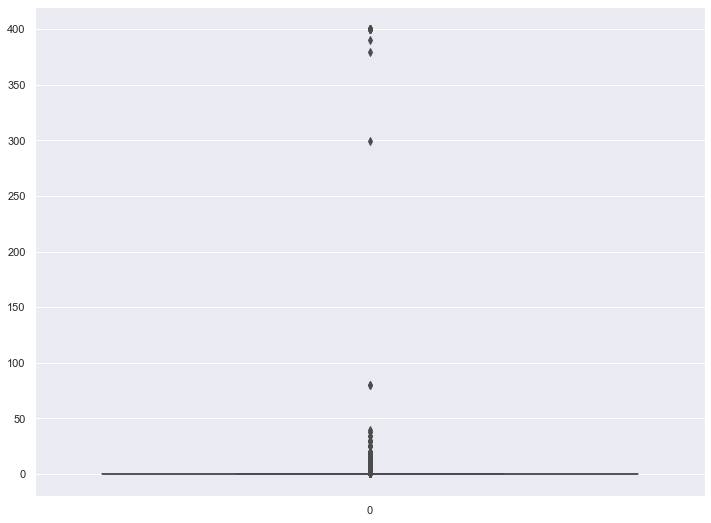

In [202]:
#Boxplot for Price

sns.boxplot(data=data['Price'])


Que. Are there any outliers? Think about the price of usual apps on Play Store.

Ans : Ys, there are outliers, some apps have high price

<AxesSubplot:>

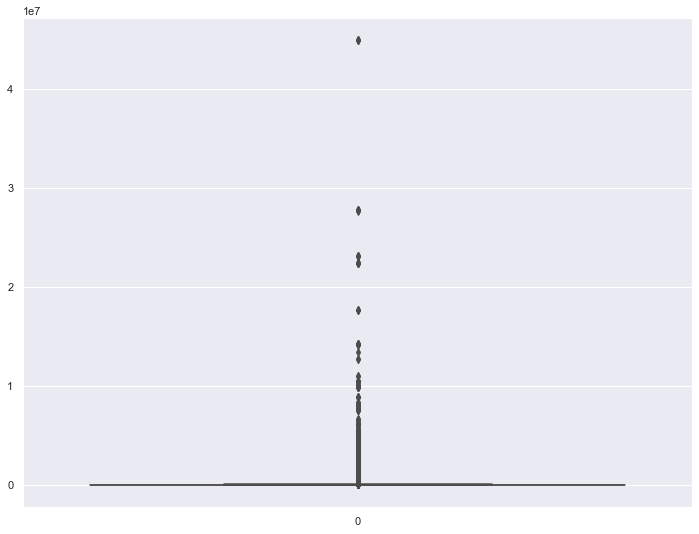

In [203]:
#Boxplot for Reviews

sns.boxplot(data=data['Reviews'])


Que. Are there any apps with very high number of reviews? Do the values seem right

Ans. There are outliers Present, the values seems right as different apps  have different reviews

<AxesSubplot:xlabel='Rating', ylabel='Count'>

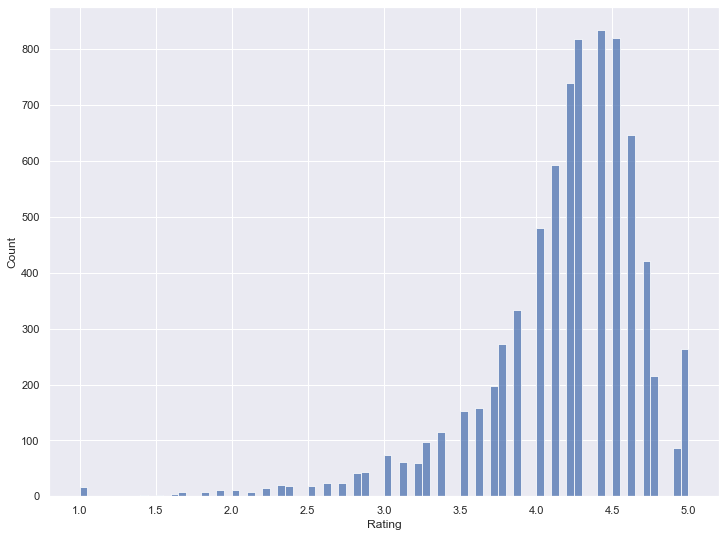

In [204]:
#Histogram for Rating

sns.histplot(data=data['Rating'])

Que : How are the ratings distributed? Is it more toward higher ratings?

Ans : Rating are mostly distrubuted from 4.0 to 4.7.  Yes, it's towards higher rating

<AxesSubplot:xlabel='Size', ylabel='Count'>

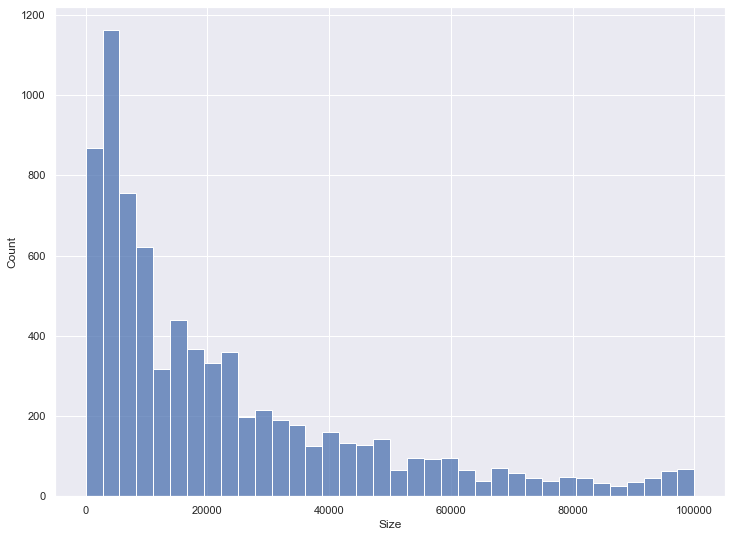

In [205]:
#Histogram for Size

sns.histplot(data=data['Size'])


Que : Note down your observations for the plots made above. Which of these seem to have outliers?

Ans. : Less size apps have more downloads. 

# Outlier treatment: 

In [206]:
#Price: From the box plot, it seems like there are some apps with very high price. 
#A price of $200 for an application on the Play Store is very high and suspicious!

#Check out the records with very high price
#Is 200 indeed a high price?



def func(Price):
    if Price>200:
        return True
    elif Price<=200:
        return False
    else:
        return None

In [207]:
more = data['Price'].map(func)

In [208]:
more_count = len(more[more == True].index) 
more_count

15

In [209]:
data.shape

(7717, 13)

In [210]:
#Drop these as most seem to be junk apps
data.drop(data[data['Price'] > 200].index, inplace = True)

In [211]:
data.shape

(7702, 13)

In [139]:
#Reviews: Very few apps have very high number of reviews. 
#These are all star apps that don’t help with the analysis and, in fact, will skew it.
#Drop records having more than 2 million reviews.

In [212]:
data.drop(data[data['Reviews']>2000000].index, inplace=True)

In [213]:
data.shape

(7483, 13)

In [145]:
#Installs:  There seems to be some outliers in this field too. 
#Apps having very high number of installs should be dropped from the analysis.

#Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [214]:
data.quantile([.1, .25, .50, .70, .90, .95])

,Rating,Reviews,Size,Installs,Price
0.10,3.5,13.0,2500.0,1000.0,0.00
0.25,4.0,99.0,5100.0,10000.0,0.00
0.50,4.3,2026.0,14000.0,100000.0,0.00
0.70,4.5,20295.6,26000.0,1000000.0,0.00
0.90,4.7,180385.4,56000.0,10000000.0,0.00
0.95,4.8,407660.3,72900.0,10000000.0,1.99


In [146]:
#Decide a threshold as cutoff for outlier and drop records having values more than that

In [215]:
data.drop(data[data['Installs']>10000000.0].index, inplace=True)

In [216]:
data.shape

(7307, 13)

# Bivariate analysis: 
Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

<AxesSubplot:xlabel='Rating', ylabel='Price'>

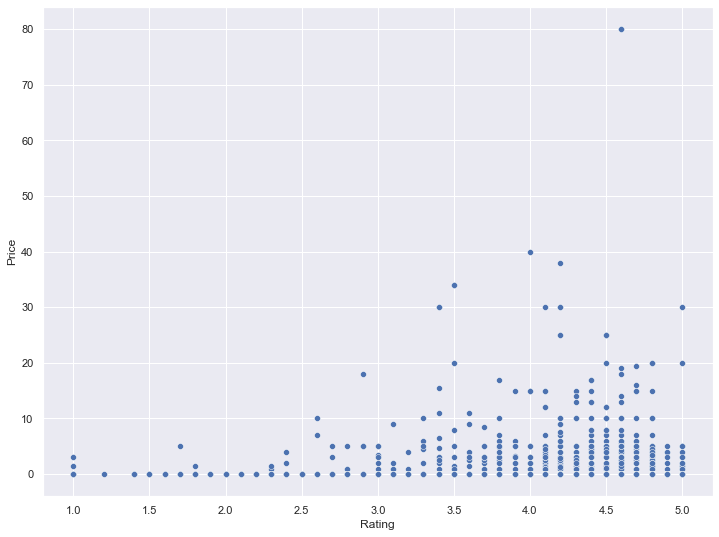

In [217]:
#Make scatter plot/joinplot for Rating vs. Price

sns.scatterplot(x='Rating', y='Price', data=data)

Que : What pattern do you observe? Does rating increase with price?

Ans : We observed that Paid apps have high ratings


<AxesSubplot:xlabel='Rating', ylabel='Size'>

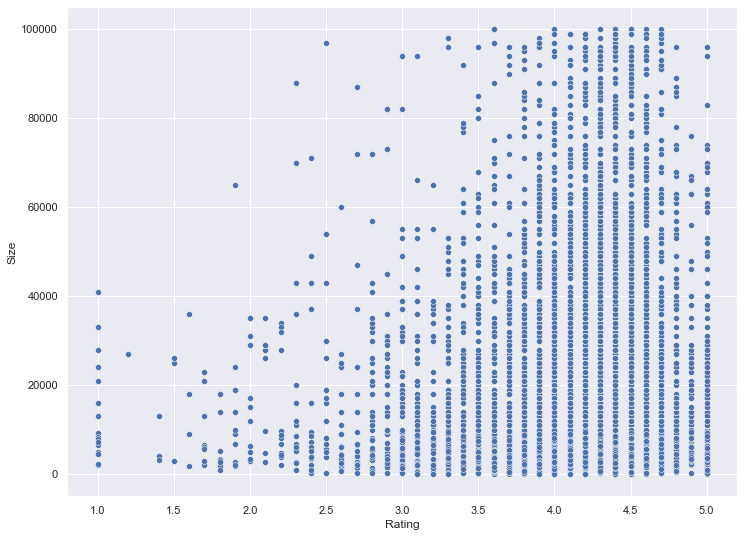

In [218]:
#Make scatter plot/joinplot for Rating vs. Size
sns.set(rc={'figure.figsize':(12,9)})
sns.scatterplot(x='Rating', y='Size', data=data)

Que : Are heavier apps rated better?

Ans : Yes, heavier apps have better rating


<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

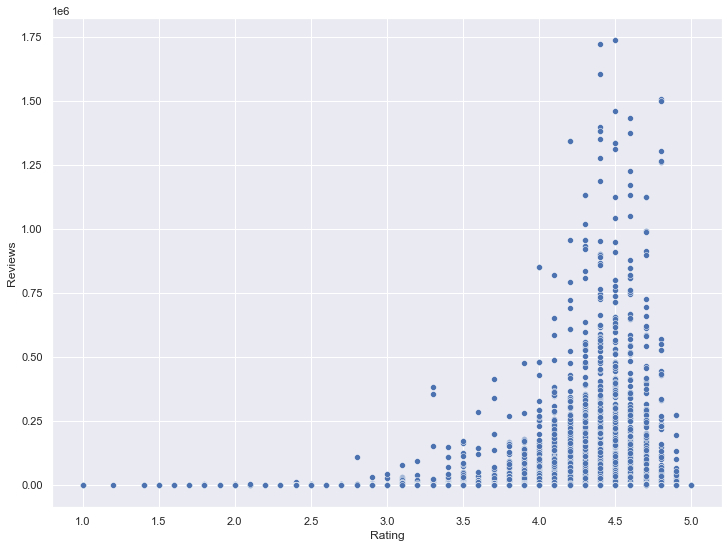

In [219]:
#Make scatter plot/joinplot for Rating vs. Reviews
sns.set(rc={'figure.figsize':(12,9)})
sns.scatterplot(x= 'Rating', y='Reviews', data=data)

Que : Does more review mean a better rating always?
    
Ans : Yes, it is clear that more review means better rating

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

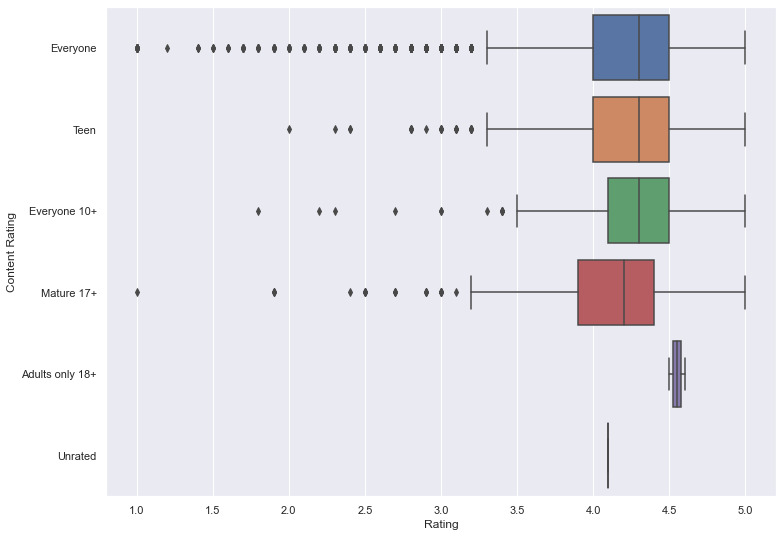

In [220]:
#Make boxplot for Rating vs. Content Rating
sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(x='Rating', y='Content Rating', data=data)

Que : Is there any difference in the ratings? Are some types liked better?

Ans : Apps which are for everyone has more bad ratings compare to other sections as it has so much outliers value, while 18+ apps have better ratings.

<AxesSubplot:xlabel='Rating', ylabel='Category'>

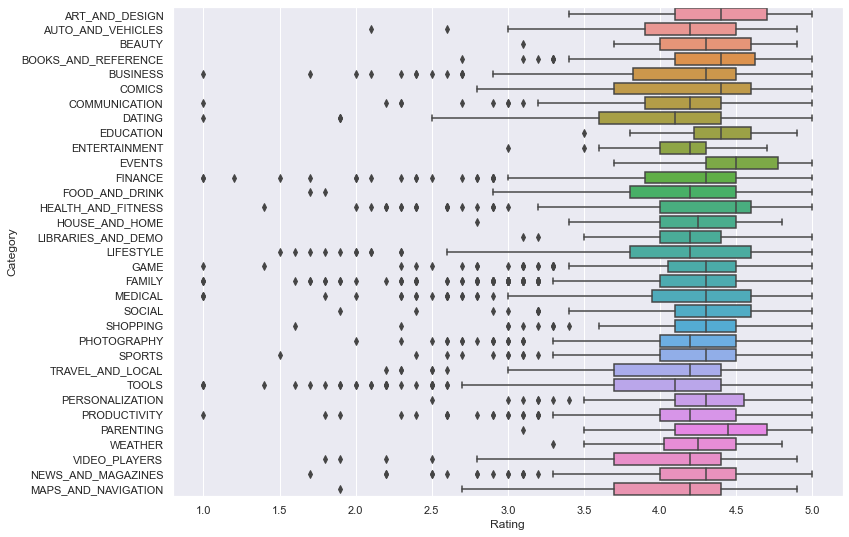

In [221]:
#Make boxplot for Ratings vs. Category

sns.set(rc={'figure.figsize':(12,9)})

sns.boxplot(x='Rating', y='Category', data=data)


Que : Which genre has the best ratings?

Ans : Event has the best rating

# Data preprocessing

In [222]:
#create a copy of the dataframe to make all the edits. Name it inp1.
inp1 = data.copy()

In [223]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [224]:
#Reviews and Install have some values that are still relatively very high.
#Before building a linear regression model, you need to reduce the skew.
#Apply log transformation (np.log1p) to Reviews and Installs.

inp1.skew()

C:\Users\Acer\AppData\Local\Temp/ipykernel_2492/1911118999.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inp1.skew()


Rating      -1.692510
Reviews      5.305328
Size         1.533259
Installs     1.922597
Price       15.724184
dtype: float64

In [225]:
reviewskew = np.log1p(inp1['Reviews'])
inp1['Reviews'] = reviewskew

reviewskew.skew()

-0.06808430177422442

In [226]:
installsskew = np.log1p(inp1['Installs'])
inp1['Installs'] 


installsskew.skew()

-0.3930918801065247

In [53]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [191]:
#Drop columns App, Last Updated, Current Ver, and Android Ver. 
#These variables are not useful for our task.

In [227]:
inp1.drop(["Last Updated","Current Ver","Android Ver","App","Type"],axis=1,inplace=True)

In [228]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,50000,0.0,Everyone,Art & Design


In [229]:
inp1.shape

(7307, 8)

In [230]:
#Get dummy columns for Category, Genres, and Content Rating. 
#This needs to be done as the models do not understand categorical data, and all data should be numeric.
#Dummy encoding is one way to convert character fields to numeric.
#Name of dataframe should be inp2.

inp2 =inp1.copy()
inp2.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,10000,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,5000000,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,100000,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,50000,0.0,Everyone,Art & Design


In [231]:
inp2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [232]:
inp2['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle', 'Action',
       'Arcade', 'Word', 'Racing', 'Casual;Creativity', 'Sports', 'Board',
       'Simulation', 'Role Playing', 'Strategy', 'Simulation;Education',
       'Action;Action & Adventure', 'Trivia', 'Casual;Brain Games',
       'Simulation;Action & Adventure', 'Educational;Creativity',
       'Puzzle;Brain Games', 'Educational;Education', 'Card;Brain 

In [233]:
#Since, There are too many categories under Genres. 
#Hence, we will try to reduce some categories
#which have very few samples under them and put them under one new common category i.e. "Other".

Genres_Count = inp2.Genres.value_counts()
Genres_Count

Tools                          607
Entertainment                  427
Education                      417
Medical                        323
Lifestyle                      272
                              ... 
Board;Pretend Play               1
Arcade;Pretend Play              1
Music & Audio;Music & Video      1
Parenting;Brain Games            1
Strategy;Creativity              1
Name: Genres, Length: 112, dtype: int64

In [234]:
lists = []
for i in Genres_Count.index:
    if Genres_Count[i]<20:
        lists.append(i)
        
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres] 


In [235]:
inp2['Genres'].unique()

array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Education;Education',
       'Education;Pretend Play', 'Entertainment', 'Events', 'Finance',
       'Food & Drink', 'Health & Fitness', 'House & Home',
       'Libraries & Demo', 'Lifestyle', 'Card', 'Casual', 'Puzzle',
       'Action', 'Arcade', 'Word', 'Racing', 'Sports', 'Board',
       'Simulation', 'Role Playing', 'Strategy', 'Trivia',
       'Educational;Education', 'Casual;Pretend Play', 'Medical',
       'Social', 'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video Players & Editors', 'News & Magazines', 'Maps & Navigation',
       'Adventure', 'Educational', 'Casino'], dtype=object)

In [236]:
inp2['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [237]:
inp2 = pd.get_dummies(data=inp2, columns=['Category','Genres','Content Rating'])

In [238]:
inp2.shape

(7307, 95)

# Train test split  and apply 70-30 split. 

In [253]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


In [240]:
#Name the new dataframes df_train and df_test.

inp3 = inp2.copy()

df_train, df_test =  tts(inp3, test_size=0.30, random_state=32)

In [241]:
# Separate the dataframes into X_train, y_train, X_test, and y_test.

y_train = df_train.pop("Rating") #Poped Rating stored in y_train
X_train = df_train



In [242]:
X_train.isnull().sum()

Reviews                        0
Size                           0
Installs                       0
Price                          0
Category_ART_AND_DESIGN        0
                              ..
Content Rating_Everyone        0
Content Rating_Everyone 10+    0
Content Rating_Mature 17+      0
Content Rating_Teen            0
Content Rating_Unrated         0
Length: 94, dtype: int64

In [243]:
y_train.isnull().sum()

0

In [271]:
y_train

7721    4.3
9876    4.3
9362    4.0
1017    4.4
4687    4.3
       ... 
6130    4.7
4641    3.4
2099    4.5
2386    4.1
4414    3.7
Name: Rating, Length: 5114, dtype: float64

In [244]:
y_test = df_test.pop("Rating")
X_test = df_test

# Model building

In [245]:
print(np.any(np.isnan(X_train)),np.all(np.isfinite(X_train)))

False True


In [246]:
print(np.any(np.isnan(y_train)),np.all(np.isfinite(y_train)))

False True


In [262]:
#Use linear regression as the technique
reg_all = LR()
reg_all.fit(X_train,y_train)

LinearRegression()

In [287]:
# Make predictions on train set and report R2
y_pred = reg_all.predict(X_train)
print(r2_score(y_train, y_pred))

0.07271473984569021


In [282]:
#Report the R2 on the train set

R2_train = round(reg_all.score(X_train, y_train),3)
print("R2 value of Training Set: {}".format(R2_train))

R2 value of Training Set: 0.073


In [283]:
# Make predictions on test set and report R2
y_pred = reg_all.predict(X_test)
print(r2_score(y_test, y_pred))

0.04443685036791378
